In [1]:
from google.colab import files
uploaded=files.upload()

Saving zomato.csv to zomato.csv


Saving zomato.csv to zomato (3).csv


/tmp/ipython-input-3749091039.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




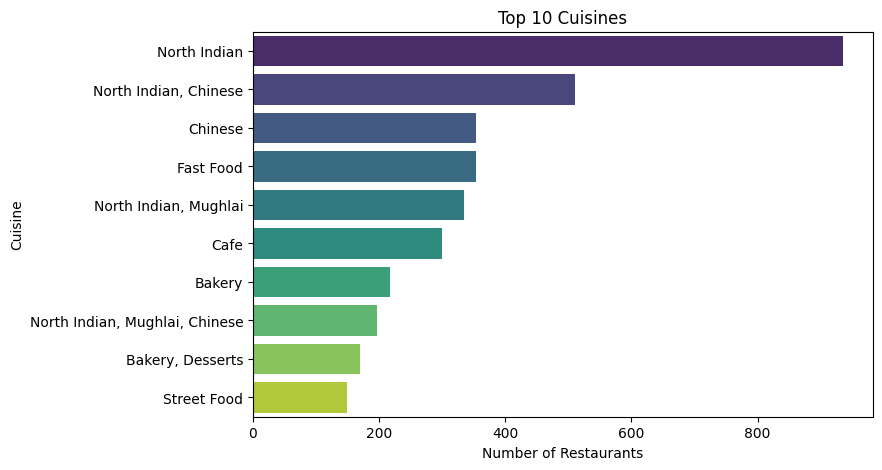

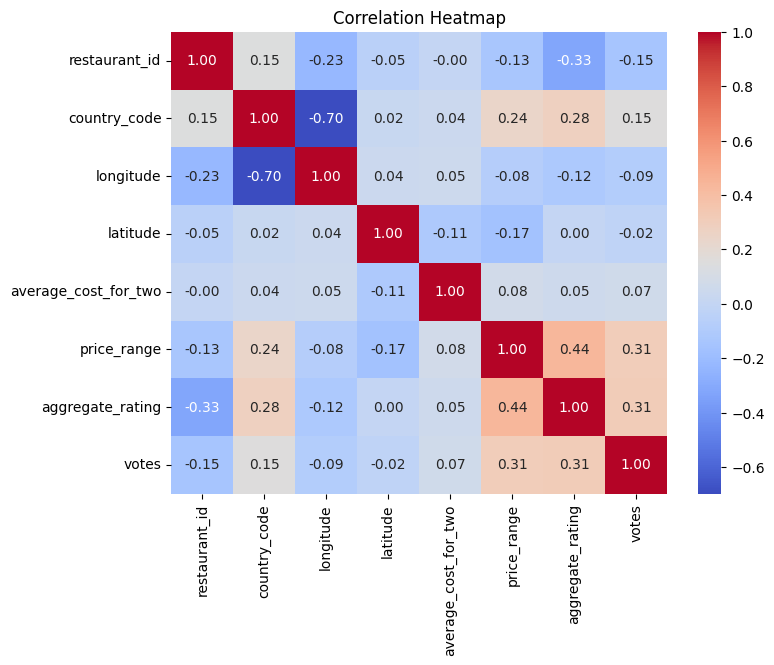


✅ Cleaned dataset saved as 'zomato_clean.csv'


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0], encoding="latin-1")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
def find_col(keyword):
    for col in df.columns:
        if keyword in col.lower():
            return col
    return None

cost_col = find_col("cost")
rating_col = find_col("rate")
cuisine_col = find_col("cuisine")
location_col = find_col("location")
online_order_col = find_col("online")
book_table_col = find_col("book")
if cost_col:
    df[cost_col] = df[cost_col].astype(str).str.replace(",", "").replace("nan", np.nan).astype(float)
if rating_col:
    df[rating_col] = df[rating_col].astype(str).str.replace("/5", "").replace("nan", np.nan).astype(float)

if cuisine_col:
    top_cuisines = df[cuisine_col].value_counts().head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="viridis")
    plt.title("Top 10 Cuisines")
    plt.xlabel("Number of Restaurants")
    plt.ylabel("Cuisine")
    plt.show()
if cost_col and rating_col:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x=cost_col, y=rating_col, hue=online_order_col if online_order_col else None, alpha=0.6)
    plt.title("Cost for Two vs Rating")
    plt.show()
if cuisine_col and rating_col:
    top_5_cuisines = df[cuisine_col].value_counts().head(5).index
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df[df[cuisine_col].isin(top_5_cuisines)], x=cuisine_col, y=rating_col, palette="Set2")
    plt.title("Rating Distribution by Top 5 Cuisines")
    plt.xticks(rotation=45)
    plt.show()
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
if online_order_col:
    order_counts = df[online_order_col].value_counts()
    fig = px.pie(values=order_counts.values, names=order_counts.index, title="Online Order Availability")
    fig.show()
if book_table_col:
    booking_counts = df[book_table_col].value_counts()
    fig = px.pie(values=booking_counts.values, names=booking_counts.index, title="Table Booking Availability")
    fig.show()
if location_col and rating_col:
    city_rating = df.groupby(location_col)[rating_col].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=city_rating.values, y=city_rating.index, palette="coolwarm")
    plt.title("Top 10 Locations by Average Rating")
    plt.xlabel("Average Rating")
    plt.show()
df.to_csv("zomato_clean.csv", index=False)
print("\n✅ Cleaned dataset saved as 'zomato_clean.csv'")

